#### Cell 크기 조정

In [47]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# Task 1
```
combine two public data sets into a single CSV file that contains 3 columns: “Country Code”, “Percentage of individuals” and “Number of Bed-places”. The “Country Code” column should be distinct and should not contain missing data.

(tour_data)
Rows to use: You should only use rows where:
·      “accomunit” is “BEDPL”
·      “unit” is “NR”
·      “nace_r2” is “I551”
·      “TIME_PERDIO” is “2016”

(device_data)
Rows to use: 
·      “ind_type” is “IND_TOTAL”
·      “indic_is” is “I_IUG_TV”
·      “unit” is “PC_IND”
·      “TIME_PERIOD” is “2016”
```

In [4]:
import re
import gzip
import pandas as pd
import numpy as np

In [5]:
file_path = "./data/"
result_path = "./result/"
tour_cap_nat = "estat_tour_cap_nat.tsv.gz"
device = "estat_isoc_ci_dev_i.tsv.gz"

In [6]:
def clean_obs_percent_value(x):
    s = str(x).strip()
    if s.endswith("bu") or s.endswith("u"):
        return 0.0
    s_clean = re.sub(r"[^\d\.]+$", "", s)
    
    try:
        return float(s_clean)
    except ValueError:
        return 0.0


def data_formatting(file_path, file_nm, file_version):
    with gzip.open(file_path+file_nm) as f:
        df = pd.read_csv(f, sep='\t')
    col_list = df.columns.tolist()
    df = df[[col_list[0], '2016 ']]
    df[col_list[0].split(',')[:-1]+['geo']] = \
        df[col_list[0]].str.split(',', expand=True)
    if file_version == 'tour':
        df.rename(columns={'2016 ': 'obs_value'}, inplace=True)
        df = df[col_list[0].split(',')[:-1]+['geo']+['obs_value']]
    elif file_version == 'device':
        df.rename(columns={'2016 ': 'obs_percent_value'}, inplace=True)
        df = df[col_list[0].split(',')[:-1]+['geo']+['obs_percent_value']]
    else:
        raise ValueError("file version option only takes 'tour' or 'device'. ")
    return df


def df_preprocess_by_condition(df, file_version):
    df = df[df["geo"].str.len() < 3]
    if file_version == 'tour':
        df['obs_value'] = df['obs_value'].apply(lambda x: np.nan if x == ': ' else x)
        df['obs_value'] = df['obs_value'].astype(float)
    elif file_version == 'device':
        df['obs_percent_value'] = df['obs_percent_value'].apply(lambda x: np.nan if x == ': ' else x)
        df['obs_percent_value'] = df['obs_percent_value'].apply(clean_obs_percent_value)
    else:
        raise ValueError("file version option only takes 'tour' or 'device'. ")
    return df


def merge_and_preprocess_data(df1, df2):
    df = pd.merge(df1, df2, on='geo', how='outer')
    df = df[['geo', 'obs_percent_value', 'obs_value']]
    # fill na with 0
    df['obs_value'] = df['obs_value'].fillna(0)
    df['obs_percent_value'] = df['obs_percent_value'].fillna(0)
    
    df = df.round({'obs_percent_value': 2, 'obs_value': 1})
    df['obs_value'] = df['obs_value'].astype(int)
    df = df.groupby('geo', as_index=False).sum()
    df.rename(columns={'geo': 'Country Code', 'obs_percent_value': "Percentage of individuals", "obs_value": "Number of Bed-places"}, inplace=True)
    df.to_csv(result_path+"merged.csv", index=False)
    return df

In [7]:
tour_data = data_formatting(file_path, tour_cap_nat, file_version='tour')
# sorting condition
tour_data = tour_data[(tour_data["accomunit"]=='BEDPL') & (tour_data['unit']=='NR') & (tour_data["nace_r2"]=="I551")]
tour_data = df_preprocess_by_condition(tour_data, file_version='tour')
tour_data

/var/folders/wr/t3v53z4x6pvffc92nbl9_tf00000gn/T/ipykernel_38550/2082650891.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['obs_value'] = df['obs_value'].apply(lambda x: np.nan if x == ': ' else x)
/var/folders/wr/t3v53z4x6pvffc92nbl9_tf00000gn/T/ipykernel_38550/2082650891.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['obs_value'] = df['obs_value'].astype(float)


,freq,accomunit,unit,nace_r2,geo,obs_value
0,A,BEDPL,NR,I551,AT,601945.0
1,A,BEDPL,NR,I551,BE,129232.0
2,A,BEDPL,NR,I551,BG,281869.0
3,A,BEDPL,NR,I551,CH,271710.0
4,A,BEDPL,NR,I551,CY,83251.0
5,A,BEDPL,NR,I551,CZ,317756.0
6,A,BEDPL,NR,I551,DE,1784654.0
7,A,BEDPL,NR,I551,DK,90503.0
8,A,BEDPL,NR,I551,EA,10019920.0
11,A,BEDPL,NR,I551,EE,32404.0


In [8]:
device_data = data_formatting(file_path, device, file_version='device')
# sorting condition
device_data = device_data[(device_data["ind_type"]=="IND_TOTAL") & (device_data["indic_is"]=="I_IUG_TV") & (device_data["unit"]=="PC_IND")]
device_data = df_preprocess_by_condition(device_data, file_version='device')
device_data

/var/folders/wr/t3v53z4x6pvffc92nbl9_tf00000gn/T/ipykernel_38550/2082650891.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['obs_percent_value'] = df['obs_percent_value'].apply(lambda x: np.nan if x == ': ' else x)
/var/folders/wr/t3v53z4x6pvffc92nbl9_tf00000gn/T/ipykernel_38550/2082650891.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['obs_percent_value'] = df['obs_percent_value'].apply(clean_obs_percent_value)


,freq,ind_type,indic_is,unit,geo,obs_percent_value
34913,A,IND_TOTAL,I_IUG_TV,PC_IND,AT,14.78
34914,A,IND_TOTAL,I_IUG_TV,PC_IND,BE,9.89
34915,A,IND_TOTAL,I_IUG_TV,PC_IND,BG,3.71
34916,A,IND_TOTAL,I_IUG_TV,PC_IND,CY,6.41
34917,A,IND_TOTAL,I_IUG_TV,PC_IND,CZ,5.32
34918,A,IND_TOTAL,I_IUG_TV,PC_IND,DE,17.88
34919,A,IND_TOTAL,I_IUG_TV,PC_IND,DK,22.02
34920,A,IND_TOTAL,I_IUG_TV,PC_IND,EA,11.68
34921,A,IND_TOTAL,I_IUG_TV,PC_IND,EE,11.44
34922,A,IND_TOTAL,I_IUG_TV,PC_IND,EL,4.73


In [25]:
merge_data = merge_and_preprocess_data(tour_data, device_data)
merge_sorted = merge_data.sort_values(by='Number of Bed-places', ascending=False)
merge_sorted

,Country Code,Percentage of individuals,Number of Bed-places
8,EA,11.68,10019920
18,IT,4.84,2248225
36,UK,23.43,1950485
11,ES,13.11,1893978
6,DE,17.88,1784654
13,FR,7.89,1312372
35,TR,0.00,1240035
10,EL,4.73,797995
0,AT,14.78,601945
29,PT,6.63,337175


# Task 2

```
Imagine you are working for a company that is developing a night lamp for hotels that is connected to the hotel’s smart network. Guests at the hotel can control the night lamp in their room using their smart TV remote control. Your company is considering expanding into the European market but is not sure which national market to launch in first. You are tasked with producing a data set that can be used to make an informed decision about which national market is the best fit.

visualize the resulting data set, you may visualize the data in whatever way you see fit, both plots and tables are fine. Please produce at minimum 1 and at maximum 3 visualizations in total.
```

1. Countries with a high number of bed-places are generally considered to have a large hotel (tourism) market.
<br><br>
2. However, having a large market does not guarantee success. Especially when introducing new technology to consumers, there needs to be a sufficient number of users who can easily accept and utilize that technology.
<br><br>
3. Therefore, it seems best to choose as the first launch country one that not only has a relatively high number of bed-places, but also a relatively high proportion of individuals who are proficient in using smart TVs. <br>
    -> I recommend UK

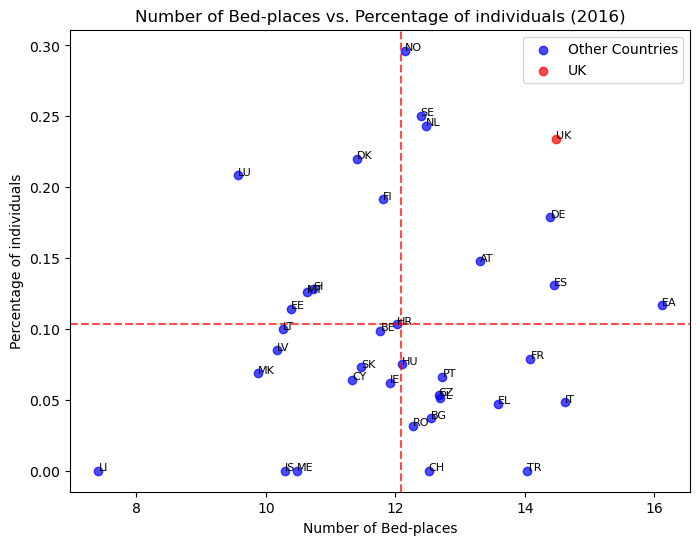

In [46]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df = merge_sorted.copy()
df = df[df['Number of Bed-places'] > 0]
df['log_bedplaces'] = np.log(df['Number of Bed-places'])

x_mean = df['log_bedplaces'].mean()
y_mean = df['Percentage of individuals'].mean()

df_uk = df[df['Country Code'] == 'UK']
df_non_uk = df[df['Country Code'] != 'UK']

plt.figure(figsize=(8, 6))
plt.scatter(df_non_uk['log_bedplaces'], df_non_uk['Percentage of individuals'], 
            alpha=0.7, color='blue', label='Other Countries')
plt.scatter(df_uk['log_bedplaces'], df_uk['Percentage of individuals'], 
            alpha=0.7, color='red', label='UK')

plt.axvline(x=x_mean, color='red', linestyle='--', alpha=0.7)  
plt.axhline(y=y_mean, color='red', linestyle='--', alpha=0.7) 

for i, row in df.iterrows():
    plt.text(row['log_bedplaces'], row['Percentage of individuals'], 
             row['Country Code'], fontsize=8)
    
plt.xlabel('Number of Bed-places')
plt.ylabel('Percentage of individuals')
plt.title('Number of Bed-places vs. Percentage of individuals (2016)')
plt.legend()

plt.savefig(result_path+"log_scatter_plot.png", dpi='figure')
plt.show()